# Spilt-belt adapation analysis

Analyze and visualize the adaptation that control flies undergo while their left and right legs are driven at different speeds

### Brandon Pratt, 06/26/2023

In [1]:
# python libraries
import os
from os import listdir
from os.path import isfile, join
import math

%matplotlib inline
import matplotlib.pyplot as plt
import ptitprince as pt
import matplotlib.colors as colors
import matplotlib.patches as  mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pandas as pd
import seaborn as sea
from scipy import interpolate
from scipy.stats import vonmises
from scipy.stats import iqr
from scipy.stats import mode
from scipy import stats
from scipy.stats import norm, lognorm, gamma, powerlaw, pearsonr
from sklearn.metrics import r2_score
from matplotlib.cbook import boxplot_stats


In [10]:
# declare variables
genotypes = ['R39B11_kir', 'R48A07AD_kir']
results_dir = 'C:/Users/pratt/Desktop/Analysis/SPLIT_BELT_RESULTS/results/'
# results_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/Brandon/Analysis/SPLIT_BELT_RESULTS/results/'
figure_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/Brandon/manuscripts/linear_splitbelt_treadmill_paper/figures/SB_raw/'

for j in range(len(genotypes)):
    if j == 0:
        # meta variables
        meta_matrix = np.load(results_dir + genotypes[j] + '_meta_matrix.npy', allow_pickle=True)
        beh_class = np.load(results_dir + genotypes[j] + '_behavior_classification.npy', allow_pickle=True)
        tarsi_class = np.load(results_dir + genotypes[j] + '_tarsi_classification.npy', allow_pickle=True)
        swing_stance_mat = np.load(results_dir + genotypes[j] + '_swing_stance_matrix_walking.npy', allow_pickle=True)
        swing_stance_mat_posture = np.load(results_dir + genotypes[j] + '_swing_stance_matrix_posture.npy', allow_pickle=True)

        # body kinematics 
        heading_angle = np.load(results_dir + genotypes[j] + '_heading_angle.npy', allow_pickle=True)
        total_vel = np.load(results_dir + genotypes[j] + '_total_velocity.npy', allow_pickle=True)
        parallel_vel = np.load(results_dir + genotypes[j] + '_parallel_velocity.npy', allow_pickle=True)
        perpendiular_vel = np.load(results_dir + genotypes[j] + '_perpendicular_velocity.npy', allow_pickle=True)
        position_prob = np.load(results_dir + genotypes[j] + '_position_probability.npy', allow_pickle=True)

        # posture variables 
        body_height_walking = np.load(results_dir + genotypes[j] + '_body_height_walking.npy', allow_pickle=True)
        body_height_posture = np.load(results_dir + genotypes[j] + '_body_height_posture.npy', allow_pickle=True)
        body_pitch = np.load(results_dir + genotypes[j] + '_body_pitch.npy', allow_pickle=True)
        body_angle = np.load(results_dir + genotypes[j] + '_body_angle.npy', allow_pickle=True)
        polygon_area = np.load(results_dir + genotypes[j] + '_polygon_area_walking.npy', allow_pickle=True)
        polygon_area_posture = np.load(results_dir + genotypes[j] + '_polygon_area_posture.npy', allow_pickle=True)
        static_stability = np.load(results_dir + genotypes[j] + '_static_stability_walking.npy', allow_pickle=True)
        static_stability_posture = np.load(results_dir + genotypes[j] + '_static_stability_posture.npy', allow_pickle=True)

        # spatial kinematics
        aepx = np.load(results_dir + genotypes[j] + '_AEPx.npy', allow_pickle=True)
        aepy = np.load(results_dir + genotypes[j] + '_AEPy.npy', allow_pickle=True)
        pepx = np.load(results_dir + genotypes[j] + '_PEPx.npy', allow_pickle=True)
        pepy = np.load(results_dir + genotypes[j] + '_PEPy.npy', allow_pickle=True)
        swing_height = np.load(results_dir + genotypes[j] + '_swing_height.npy', allow_pickle=True)
        swing_linearity = np.load(results_dir + genotypes[j] + '_swing_linearity.npy', allow_pickle=True)
        stance_distance = np.load(results_dir + genotypes[j] + '_stance_distance.npy', allow_pickle=True)
        swing_distance = np.load(results_dir + genotypes[j] + '_swing_distance.npy', allow_pickle=True)
        limb_positions = np.load(results_dir + genotypes[j] + '_limb_positions.npy', allow_pickle=True)
        step_distance = np.load(results_dir + genotypes[j] + '_step_distance.npy', allow_pickle=True)

        # temporal kinematics 
        step_freq = np.load(results_dir + genotypes[j] + '_step_frequency.npy', allow_pickle=True)
        stance_duration = np.load(results_dir + genotypes[j] + '_stance_duration.npy', allow_pickle=True)
        swing_duration = np.load(results_dir + genotypes[j] + '_swing_duration.npy', allow_pickle=True)
        duty_factor = np.load(results_dir + genotypes[j] + '_duty_factor.npy', allow_pickle=True)
        step_speed = np.load(results_dir + genotypes[j] + '_step_speed.npy', allow_pickle=True)
        stance_speed = np.load(results_dir + genotypes[j] + '_stance_speed.npy', allow_pickle=True)
        swing_speed = np.load(results_dir + genotypes[j] + '_swing_speed.npy', allow_pickle=True)
        
        # interlimb coordination parameters 
        phase = np.load(results_dir + genotypes[j] + '_phase.npy', allow_pickle=True)
        relative_distance = np.load(results_dir + genotypes[j] + '_relative_distance.npy', allow_pickle=True)
        relative_stance_onset = np.load(results_dir + genotypes[j] + '_relative_stance_onset.npy', allow_pickle=True)
        nlegs_stance = np.load(results_dir + genotypes[j] + '_number_legs_in_stance_walking.npy', allow_pickle=True)
        duration_nlegs = np.load(results_dir + genotypes[j] + '_legs_in_stance_duration.npy', allow_pickle=True)
        left_tcs = np.load(results_dir + genotypes[j] + '_left_tcs.npy', allow_pickle=True)
        right_tcs = np.load(results_dir + genotypes[j] + '_right_tcs.npy', allow_pickle=True)
    else: # concatenation
        # meta variables
        temp_meta_mat = np.load(results_dir + genotypes[j] + '_meta_matrix.npy', allow_pickle=True) 
        temp_meta_mat[:,0] = temp_meta_mat[:,0] + np.max(meta_matrix[:,0]) # adjust fly number
        meta_matrix = np.concatenate((meta_matrix, temp_meta_mat))
        beh_class = np.concatenate((beh_class, np.load(results_dir + genotypes[j] + '_behavior_classification.npy', allow_pickle=True)))
        tarsi_class = np.concatenate((tarsi_class, np.load(results_dir + genotypes[j] + '_tarsi_classification.npy', allow_pickle=True)))
        swing_stance_mat = np.concatenate((swing_stance_mat, np.load(results_dir + genotypes[j] + '_swing_stance_matrix_walking.npy', allow_pickle=True)), axis =2)
        swing_stance_mat_posture = np.concatenate((swing_stance_mat_posture, np.load(results_dir + genotypes[j] + '_swing_stance_matrix_posture.npy', allow_pickle=True)), axis =2)
        
        # body kinematics 
        heading_angle = np.concatenate((heading_angle, np.load(results_dir + genotypes[j] + '_heading_angle.npy', allow_pickle=True)))
        total_vel = np.concatenate((total_vel, np.load(results_dir + genotypes[j] + '_total_velocity.npy', allow_pickle=True)))
        parallel_vel = np.concatenate((parallel_vel, np.load(results_dir + genotypes[j] + '_parallel_velocity.npy', allow_pickle=True)))
        perpendiular_vel = np.concatenate((perpendiular_vel, np.load(results_dir + genotypes[j] + '_perpendicular_velocity.npy', allow_pickle=True)))
        position_prob = np.concatenate((position_prob, np.load(results_dir + genotypes[j] + '_position_probability.npy', allow_pickle=True)))

        # posture variables 
        body_height_walking = np.concatenate((body_height_walking, np.load(results_dir + genotypes[j] + '_body_height_walking.npy', allow_pickle=True)))
        body_height_posture = np.concatenate((body_height_posture, np.load(results_dir + genotypes[j] + '_body_height_posture.npy', allow_pickle=True)))
        body_pitch = np.concatenate((body_pitch, np.load(results_dir + genotypes[j] + '_body_pitch.npy', allow_pickle=True)))
        body_angle = np.concatenate((body_angle, np.load(results_dir + genotypes[j] + '_body_angle.npy', allow_pickle=True)))
        polygon_area = np.concatenate((polygon_area, np.load(results_dir + genotypes[j] + '_polygon_area_walking.npy', allow_pickle=True)))
        polygon_area_posture = np.concatenate((polygon_area_posture, np.load(results_dir + genotypes[j] + '_polygon_area_posture.npy', allow_pickle=True)))
        static_stability = np.concatenate((static_stability, np.load(results_dir + genotypes[j] + '_static_stability_walking.npy', allow_pickle=True)))
        static_stability_posture = np.concatenate((static_stability_posture, np.load(results_dir + genotypes[j] + '_static_stability_posture.npy', allow_pickle=True)))

        # spatial kinematics
        aepx = np.concatenate((aepx, np.load(results_dir + genotypes[j] + '_AEPx.npy', allow_pickle=True)), axis = 2)
        aepy = np.concatenate((aepy, np.load(results_dir + genotypes[j] + '_AEPy.npy', allow_pickle=True)), axis = 2)
        pepx = np.concatenate((pepx, np.load(results_dir + genotypes[j] + '_PEPx.npy', allow_pickle=True)), axis = 2)
        pepy = np.concatenate((pepy, np.load(results_dir + genotypes[j] + '_PEPy.npy', allow_pickle=True)), axis = 2)
        swing_height = np.concatenate((swing_height, np.load(results_dir + genotypes[j] + '_swing_height.npy', allow_pickle=True)), axis = 2)
        swing_linearity = np.concatenate((swing_linearity, np.load(results_dir + genotypes[j] + '_swing_linearity.npy', allow_pickle=True)), axis = 2)
        stance_distance = np.concatenate((stance_distance, np.load(results_dir + genotypes[j] + '_stance_distance.npy', allow_pickle=True)), axis = 2)
        swing_distance = np.concatenate((swing_distance, np.load(results_dir + genotypes[j] + '_swing_distance.npy', allow_pickle=True)), axis = 2)
        limb_positions = np.concatenate((limb_positions, np.load(results_dir + genotypes[j] + '_limb_positions.npy', allow_pickle=True)), axis = 3)
        step_distance = np.concatenate((step_distance, np.load(results_dir + genotypes[j] + '_step_distance.npy', allow_pickle=True)), axis = 2)
        
        # temporal kinematics 
        step_freq = np.concatenate((step_freq, np.load(results_dir + genotypes[j] + '_step_frequency.npy', allow_pickle=True)), axis = 2)
        stance_duration = np.concatenate((stance_duration, np.load(results_dir + genotypes[j] + '_stance_duration.npy', allow_pickle=True)), axis = 2)
        swing_duration = np.concatenate((swing_duration, np.load(results_dir + genotypes[j] + '_swing_duration.npy', allow_pickle=True)), axis = 2)
        duty_factor = np.concatenate((duty_factor, np.load(results_dir + genotypes[j] + '_duty_factor.npy', allow_pickle=True)), axis = 2)
        step_speed = np.concatenate((step_speed, np.load(results_dir + genotypes[j] + '_step_speed.npy', allow_pickle=True)), axis = 2)
        stance_speed = np.concatenate((stance_speed, np.load(results_dir + genotypes[j] + '_stance_speed.npy', allow_pickle=True)), axis = 2)
        swing_speed = np.concatenate((swing_speed, np.load(results_dir + genotypes[j] + '_swing_speed.npy', allow_pickle=True)), axis = 2)
        
        # interlimb coordination parameters 
        phase = np.concatenate((phase,np.load(results_dir + genotypes[j] + '_phase.npy', allow_pickle=True)), axis = 2)
        relative_distance = np.concatenate((relative_distance, np.load(results_dir + genotypes[j] + '_relative_distance.npy', allow_pickle=True)), axis = 2)
        relative_stance_onset = np.concatenate((relative_stance_onset, np.load(results_dir + genotypes[j] + '_relative_stance_onset.npy', allow_pickle=True)), axis = 2)
        nlegs_stance = np.concatenate((nlegs_stance, np.load(results_dir + genotypes[j] + '_number_legs_in_stance_walking.npy', allow_pickle=True)))
        duration_nlegs = np.concatenate((duration_nlegs, np.load(results_dir + genotypes[j] + '_legs_in_stance_duration.npy', allow_pickle=True)), axis = 2)
        left_tcs = np.concatenate((left_tcs, np.load(results_dir + genotypes[j] + '_left_tcs.npy', allow_pickle=True)))
        right_tcs = np.concatenate((right_tcs, np.load(results_dir + genotypes[j] + '_right_tcs.npy', allow_pickle=True)))
        


### Number of legs in stance analysis

In [11]:
tied = meta_matrix[:, 4] != 1
split = meta_matrix[:, 4] == 1
nflies = len(np.unique(meta_matrix[:,0]).tolist())
nleg_prob_fly = np.zeros((nflies, 7, 2)) # flies/ categories/ tied, split
nleg_prob_global = np.zeros((2, 7)) # tied, split/ categories

for fly in np.unique(meta_matrix[:,0]).astype(int).tolist():
    fly_idxs = meta_matrix[:,0] == fly
    tied_idxs = np.logical_and(tied, fly_idxs)
    split_idxs = np.logical_and(split, fly_idxs)
    
    nlegs_tied = nlegs_stance[tied_idxs,:].flatten()
    nlegs_split = nlegs_stance[split_idxs,:].flatten()
    
    beh_class_tied = beh_class[tied_idxs,:].flatten()
    beh_class_split = beh_class[split_idxs,:].flatten()
    
    tarsi_class_tied = tarsi_class[tied_idxs,:].flatten()
    tarsi_class_split = tarsi_class[split_idxs,:].flatten()
    
    # filter velocity and heading
    filt_nlegs_tied = nlegs_tied[np.logical_and(beh_class_tied==1, tarsi_class_tied != 7)]
    filt_nlegs_split = nlegs_split[np.logical_and(beh_class_split==1, tarsi_class_split == 0)]
    
    # remove nans if present
    filt_nlegs_tied = filt_nlegs_tied[~np.isnan(filt_nlegs_tied)]
    filt_nlegs_split = filt_nlegs_split[~np.isnan(filt_nlegs_split)]
    
    # compute probability of a certain number of legs in stance
    # compute probability distribution for each of the nleg categories
    temp_prob_tied = np.zeros(7)
    temp_prob_split = np.zeros(7)
    for j in range(7):
        temp_prob_tied[j] = len(np.where(filt_nlegs_tied==j)[0])
        temp_prob_split[j] = len(np.where(filt_nlegs_split==j)[0])
    nleg_prob_fly[fly-1,:,0] = temp_prob_tied/np.sum(temp_prob_tied)
    nleg_prob_fly[fly-1,:,1] = temp_prob_split/np.sum(temp_prob_split)
    
    if fly == 1:
        cat_tied_nlegs = filt_nlegs_tied
        cat_split_nlegs = filt_nlegs_split
    else:
        cat_tied_nlegs = np.concatenate((cat_tied_nlegs, filt_nlegs_tied))
        cat_split_nlegs = np.concatenate((cat_split_nlegs, filt_nlegs_split))
        
# global nleg probability
for j in range(7):
    nleg_prob_global[0, j] = len(np.where(cat_tied_nlegs==j)[0])
    nleg_prob_global[1, j] = len(np.where(cat_split_nlegs==j)[0])
nleg_prob_global[0, :] = nleg_prob_global[0, :]/np.sum(nleg_prob_global[0, :])
nleg_prob_global[1, :] = nleg_prob_global[1, :]/np.sum(nleg_prob_global[1, :])

    

In [19]:
figure_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/manuscripts/treadmill_2023/figures/raw/SB/'

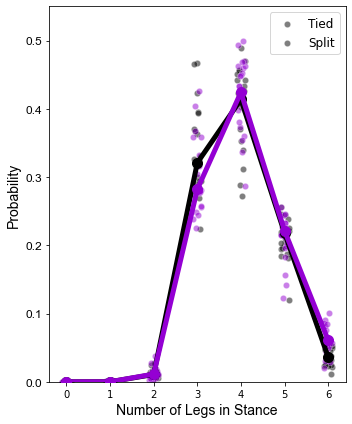

In [26]:
# plot the number or legs in stance
# plot burstiness - simple means
jitter_val = 0.1
w_adj = 0.25
g_colors = ['black', 'darkviolet']

fig = plt.figure(1, figsize =[5,6])

for j in range(2):# tied/split
    for i in range(7): #number of legs in stance
        x_jitter = i+ np.random.choice([-1,1],size=len(nleg_prob_fly[:,i,j]))*np.random.uniform(low=0.0, high=jitter_val, size=len(nleg_prob_fly[:,i,j]))
        sea.scatterplot(x=x_jitter, y=nleg_prob_fly[:,i,j], color = g_colors[j], s = 40, alpha = 0.5)
        

    # plot mean 
    # mean speed
    plt.plot(np.arange(0,7), nleg_prob_global[j, :], color =g_colors[j], marker='.', markersize = 20, linewidth = 5, alpha = 1, zorder = 25)  

# axes
plt.ylabel('Probability', fontname ='Arial', fontsize = 14)
plt.xlabel('Number of Legs in Stance', fontname = 'Arial', fontsize = 14)
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.legend(['Tied', 'Split'], fontsize = 12)
plt.ylim([0.0,0.55])
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'split_nlegs_stance.png', dpi = 300)
fig.savefig(figure_dir + 'split_nlegs_stance.svg', dpi = 300)

### Example step traces

In [139]:
# load in example walking bouts
traj_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/Brandon/manuscripts/linear_splitbelt_treadmill_paper/figures/SB_raw/'
LS_trajs = np.load(traj_dir + 'R48A07AD_kir_fly1_RS_L_8_LS_H_12_split_Trial_6_ex_traj.npy', allow_pickle=True)
RS_trajs = np.load(traj_dir + 'R48A07AD_kir_fly1_RS_H_12_LS_L_8_split_Trial_8_ex_traj.npy', allow_pickle=True)
tied_trajs = np.load(traj_dir + 'R48A07AD_kir_fly1_RS_L_10_LS_H_10_presplit_Trial_3_ex_traj.npy', allow_pickle=True)
# tied_trajs = tied_trajs[:,0:-5]

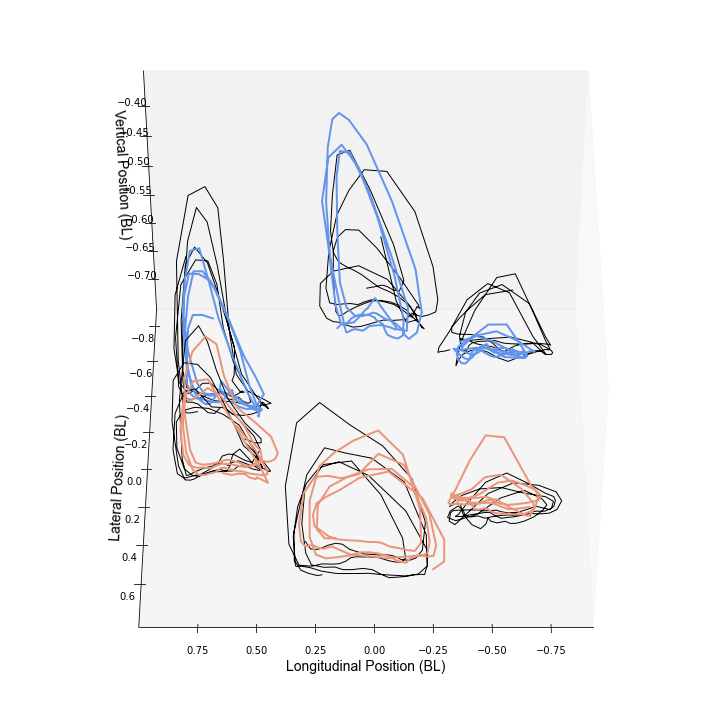

In [146]:
# 3D leg trajectory plot
fig = plt.figure(figsize = [12,10])
ax = plt.axes(projection='3d')

# plot legs
for leg in np.arange(0,LS_trajs.shape[0],3).tolist(): 

    # Tied
    ax.plot3D(tied_trajs[leg,:], tied_trajs[leg+1,:], tied_trajs[leg+2,:], linewidth = 1, color = 'black')
    
    # Faster driven legs
    if leg > 8:
        ax.plot3D(LS_trajs[leg,:], LS_trajs[leg+1,:], LS_trajs[leg+2,:], linewidth = 2, color = 'darksalmon')
    else:
        ax.plot3D(LS_trajs[leg,:], LS_trajs[leg+1,:], LS_trajs[leg+2,:], linewidth = 2, color = 'cornflowerblue')
    


ax.view_init(45,90) # up down, left right

ax.set_xlabel("Longitudinal Position (BL)", fontsize = 14, fontname = 'Arial')
ax.set_ylabel("Lateral Position (BL)", fontsize = 14, fontname = 'Arial')
ax.set_zlabel("Vertical Position (BL)", fontsize = 14, fontname = 'Arial')
ax.grid(False)

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'ex_trajs.pdf', dpi = 200)
fig.savefig(figure_dir + 'ex_trajs.png', dpi = 200)

### intralimb kinematics

In [3]:
def intralimb_kinematic_stats_dists(metric, n_step_threshold, meta_matrix, beh_class, tarsi_class):
    
    nflies = len(np.unique(meta_matrix[:, 0]).astype(int).tolist()) # how many flies
    tied_idxs = meta_matrix[:, 4] != 1 # presplit + postsplit - combined because no detectable adaptation
    split_idxs = meta_matrix[:, 4] == 1
    metric_stats = np.zeros((nflies, 5, 3, 3)) # fly number, stat value, tied/LS/RS
    leg_dists = np.array([])
    leg_identity = np.array([])
    cnt = -3
    for j in range(3): # leg combinations
        cnt += 3
        
        # isolate data per leg
        for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist():
            # find all trials associated with the specified conditions
            fly_idxs = meta_matrix[:, 0] == fly # fly

            # find tied, LS, and RS data
            tied_trial_idxs = np.logical_and.reduce((tied_idxs, fly_idxs))
            LS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 0, fly_idxs))
            RS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 1, fly_idxs))

            # get data
            # tied - get all presplit + postsplit data
            leg1_tied_data = metric[j, :, tied_trial_idxs].flatten()
            leg2_tied_data = metric[j+3, :, tied_trial_idxs].flatten()

            # combine faster moving data
            leg1_fast_split_data = metric[j, :, RS_trial_idxs].flatten()
            leg2_fast_split_data = metric[j+3, :, LS_trial_idxs].flatten()

            # combine slower moving data
            leg1_slow_split_data = metric[j, :, LS_trial_idxs].flatten() # right legs
            leg2_slow_split_data = metric[j+3, :, RS_trial_idxs].flatten() # left legs

            # behavior classifier
            beh_tied = beh_class[tied_trial_idxs, :].flatten()
            beh_RS = beh_class[RS_trial_idxs, :].flatten()
            beh_LS = beh_class[LS_trial_idxs, :].flatten()

            # tarsi classifier (just for split period)
            tarsi_class_tied = tarsi_class[tied_trial_idxs, :].flatten()
            tarsi_class_RS = tarsi_class[RS_trial_idxs, :].flatten()
            tarsi_class_LS = tarsi_class[LS_trial_idxs, :].flatten()

            # filter tied and split data
            filt_leg1_tied_data = leg1_tied_data[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            filt_leg2_tied_data = leg2_tied_data[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            cat_tied_data = np.concatenate((filt_leg1_tied_data, filt_leg2_tied_data))

            # filter split data - Fast
            filt_leg1_fast_split_data = leg1_fast_split_data[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            filt_leg2_fast_split_data = leg2_fast_split_data[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            cat_fast_split_data = np.concatenate((filt_leg1_fast_split_data, filt_leg2_fast_split_data))

            # filter slow split legs
            filt_leg1_slow_split_data = leg1_slow_split_data[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            filt_leg2_slow_split_data = leg2_slow_split_data[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            cat_slow_split_data = np.concatenate((filt_leg1_slow_split_data, filt_leg2_slow_split_data))

            # filter out nans
            filt_cat_tied_data = cat_tied_data[~np.isnan(cat_tied_data)] 
            filt_cat_fast_split_data = cat_fast_split_data[~np.isnan(cat_fast_split_data)]
            filt_cat_slow_split_data = cat_slow_split_data[~np.isnan(cat_slow_split_data)]

            # filter out -1
            filt_cat_tied_data = filt_cat_tied_data[~(filt_cat_tied_data == -1)]
            filt_cat_fast_split_data = filt_cat_fast_split_data[~(filt_cat_fast_split_data == -1)]
            filt_cat_slow_split_data = filt_cat_slow_split_data[~(filt_cat_slow_split_data == -1)]

            # compute stats
            # tied
            if len(filt_cat_tied_data) < n_step_threshold:
                metric_stats[fly-1, 0, 1, j] = np.nan
                metric_stats[fly-1, 1, 1, j] = np.nan
                metric_stats[fly-1, 2, 1, j] = np.nan
                metric_stats[fly-1, 3, 1, j] = np.nan
                metric_stats[fly-1, 4, 1, j] = len(filt_cat_tied_data) # number of steps
            else:
                metric_stats[fly-1, 0, 1, j] = np.mean(filt_cat_tied_data) # mean
                metric_stats[fly-1, 1, 1, j] = np.std(filt_cat_tied_data) # std
                metric_stats[fly-1, 2, 1, j] = np.median(filt_cat_tied_data) #median
                metric_stats[fly-1, 3, 1, j] = iqr(filt_cat_tied_data) # IQR
                metric_stats[fly-1, 4, 1, j] = len(filt_cat_tied_data) # number of steps

            # Fast split
            if len(filt_cat_fast_split_data) < n_step_threshold:
                metric_stats[fly-1, 0, 2, j] = np.nan
                metric_stats[fly-1, 1, 2, j] = np.nan
                metric_stats[fly-1, 2, 2, j] = np.nan
                metric_stats[fly-1, 3, 2, j] = np.nan
                metric_stats[fly-1, 4, 2, j] = len(filt_cat_fast_split_data) # number of steps
            else:
                metric_stats[fly-1, 0, 2, j] = np.mean(filt_cat_fast_split_data) # mean
                metric_stats[fly-1, 1, 2, j] = np.std(filt_cat_fast_split_data) # std
                metric_stats[fly-1, 2, 2, j] = np.median(filt_cat_fast_split_data) #median
                metric_stats[fly-1, 3, 2, j] = iqr(filt_cat_fast_split_data) # IQR
                metric_stats[fly-1, 4, 2, j] = len(filt_cat_fast_split_data) # number of steps

            # Slow split
            if len(filt_cat_slow_split_data) < n_step_threshold:
                metric_stats[fly-1, 0, 0, j] = np.nan
                metric_stats[fly-1, 1, 0, j] = np.nan
                metric_stats[fly-1, 2, 0, j] = np.nan
                metric_stats[fly-1, 3, 0, j] = np.nan
                metric_stats[fly-1, 4, 0, j] = len(filt_cat_slow_split_data) # number of steps
            else:
                metric_stats[fly-1, 0, 0, j] = np.mean(filt_cat_slow_split_data) # mean
                metric_stats[fly-1, 1, 0, j] = np.std(filt_cat_slow_split_data) # std
                metric_stats[fly-1, 2, 0, j] = np.median(filt_cat_slow_split_data) #median
                metric_stats[fly-1, 3, 0, j] = iqr(filt_cat_slow_split_data) # IQR
                metric_stats[fly-1, 4, 0, j] = len(filt_cat_slow_split_data) # number of steps


            if fly == 1:
                combined_tied_dist = filt_cat_tied_data 
                combined_fast_split_dist = filt_cat_fast_split_data
                combined_slow_split_dist = filt_cat_slow_split_data
            else:
                combined_tied_dist = np.concatenate((combined_tied_dist, filt_cat_tied_data))
                combined_fast_split_dist = np.concatenate((combined_fast_split_dist, filt_cat_fast_split_data))
                combined_slow_split_dist = np.concatenate((combined_slow_split_dist, filt_cat_slow_split_data))
                
        # concatenate data 
                            
        leg_dists = np.concatenate((leg_dists, combined_slow_split_dist))
        leg_dists = np.concatenate((leg_dists, combined_tied_dist))
        leg_dists = np.concatenate((leg_dists, combined_fast_split_dist))
        leg_identity = np.concatenate((leg_identity, cnt*np.ones(len(combined_slow_split_dist))))
        leg_identity = np.concatenate((leg_identity, (cnt+1)*np.ones(len(combined_tied_dist))))
        leg_identity = np.concatenate((leg_identity, (cnt+2)*np.ones(len(combined_fast_split_dist))))
        
        cnt += 1

    return leg_dists, leg_identity, metric_stats


In [8]:
def plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir):
    fig = plt.figure(1, figsize = [9,6])

#     sea.boxplot(x= plot_id, y= plot_metric, order = np.arange(min(plot_id), max(plot_id)+1),
#                    color = "black",width = 1, showcaps = True, boxprops = {'facecolor':'none', "zorder":1},
#                    showfliers=False, whiskerprops = {'linewidth':2, "zorder":1},saturation = 1, zorder =30, medianprops=dict(color="black", alpha=1))

    
    # background boxplot
    sea.boxplot(x= plot_id, y= plot_metric, order = np.arange(min(plot_id), max(plot_id)+1),
                   color = "gray",width = 0.5, showcaps = False, boxprops = {'edgecolor':'none','facecolor':'silver', "zorder":10, "alpha":0.7},
                   showfliers=False, whiskerprops = {'linewidth':1, "zorder":10, "alpha":0.7},zorder =1, medianprops=dict(color="none"))
    
    
    unique_vals = np.unique(plot_id)
    cnt = -3
    for j in range(plt_stats.shape[-1]):
        cnt += 3
        for i in range(plt_stats.shape[0]):
            if np.all(~np.isnan(plt_stats[i,0,:,j],)):
#             plt.plot(unique_vals[cnt:cnt+3], plt_stats[i,0,:,j], color = 'dimgray', marker = '.', linewidth = 1, markersize = 8, alpha = 0.5)
                plt.plot(unique_vals[cnt:cnt+3], plt_stats[i,0,:,j], color = 'black', marker = '.', linewidth = 1, markersize = 8, alpha = 1, zorder = 1)

    plt.xlim([-0.75, 10.75])
    plt.ylabel(metric_ylabel, fontsize = 14, fontname="Arial")
    plt.yticks(fontsize = 12, fontname = 'Arial')

    # plt.xticks(np.unique(cat_var)-1, np.array(['LS', 'Tied', 'RS']),fontsize = 12, fontname = 'Arial')


    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)


    plt.tight_layout()
    plt.show()

    fig.savefig(figure_dir + metric_plot_name + '.pdf', dpi = 200)
    fig.savefig(figure_dir + metric_plot_name + '.png', dpi = 200)
    fig.savefig(figure_dir + metric_plot_name + '.svg', dpi = 200)

In [5]:
# compute distributions and stats for intralimb kinematic variables
n_step_threshold = 15

step_freq_dists, step_freq_leg_id, step_freq_stats = intralimb_kinematic_stats_dists(step_freq, n_step_threshold, meta_matrix, beh_class, tarsi_class)
stance_duration_dists, stance_duration_leg_id, stance_duration_stats = intralimb_kinematic_stats_dists(stance_duration, n_step_threshold, meta_matrix, beh_class, tarsi_class)
swing_duration_dists, swing_duration_leg_id, swing_duration_stats = intralimb_kinematic_stats_dists(swing_duration, n_step_threshold, meta_matrix, beh_class, tarsi_class)
step_speed_dists, step_speed_leg_id, step_speed_stats = intralimb_kinematic_stats_dists(step_speed, n_step_threshold, meta_matrix, beh_class, tarsi_class)
stance_speed_dists, stance_speed_leg_id, stance_speed_stats = intralimb_kinematic_stats_dists(stance_speed, n_step_threshold, meta_matrix, beh_class, tarsi_class)
swing_speed_dists, swing_speed_leg_id, swing_speed_stats = intralimb_kinematic_stats_dists(swing_speed, n_step_threshold, meta_matrix, beh_class, tarsi_class)
stance_distance_dists,stance_distance_leg_id, stance_distance_stats = intralimb_kinematic_stats_dists(stance_distance, n_step_threshold, meta_matrix, beh_class, tarsi_class)
swing_distance_dists, swing_distance_leg_id, swing_distance_stats = intralimb_kinematic_stats_dists(swing_distance, n_step_threshold, meta_matrix, beh_class, tarsi_class)
step_distance_dists, step_distance_leg_id, step_distance_stats = intralimb_kinematic_stats_dists(step_distance, n_step_threshold, meta_matrix, beh_class, tarsi_class)
swing_linearity_dists, swing_linearity_leg_id, swing_linearity_stats = intralimb_kinematic_stats_dists(swing_linearity, n_step_threshold, meta_matrix, beh_class, tarsi_class)
swing_height_dists, swing_height_leg_id, swing_height_stats = intralimb_kinematic_stats_dists(swing_height, n_step_threshold, meta_matrix, beh_class, tarsi_class)

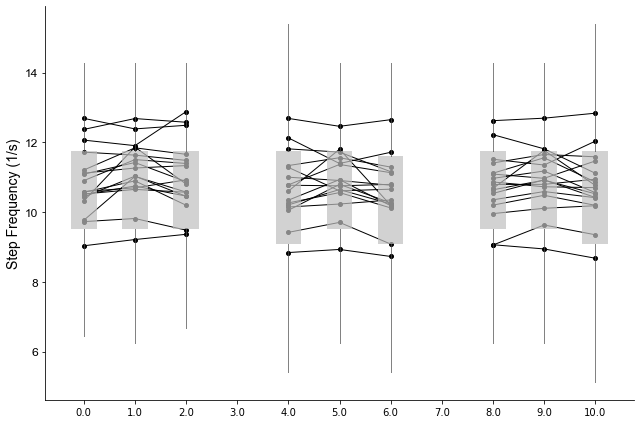

In [9]:
# combined plot of legs
plot_metric = step_freq_dists
plot_id = step_freq_leg_id
plt_stats = step_freq_stats
metric_ylabel = 'Step Frequency (1/s)'
metric_plot_name = 'step_freq'
plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir)

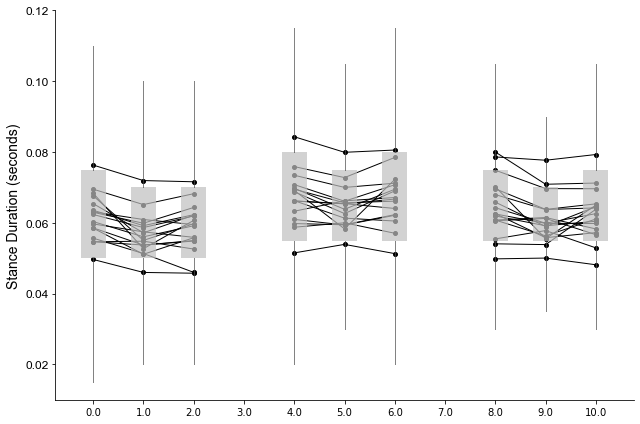

In [10]:
# combined plot of legs
plot_metric = stance_duration_dists
plot_id = stance_duration_leg_id
plt_stats = stance_duration_stats
metric_ylabel = 'Stance Duration (seconds)'
metric_plot_name = 'stance_duration'
plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir)

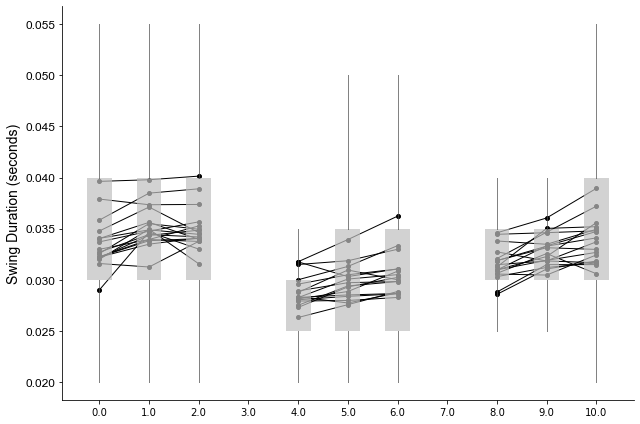

In [11]:
# combined plot of legs
plot_metric = swing_duration_dists
plot_id = swing_duration_leg_id
plt_stats = swing_duration_stats
metric_ylabel = 'Swing Duration (seconds)'
metric_plot_name = 'swing_duration'
plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir)

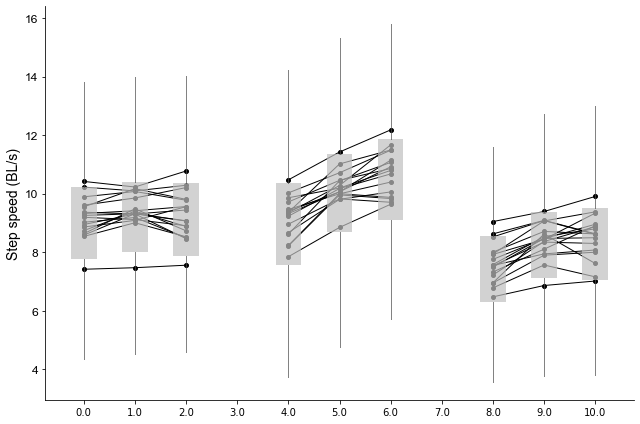

In [12]:
# combined plot of legs
plot_metric = step_speed_dists
plot_id = step_speed_leg_id
plt_stats = step_speed_stats
metric_ylabel = 'Step speed (BL/s)'
metric_plot_name = 'step_speed'
plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir)

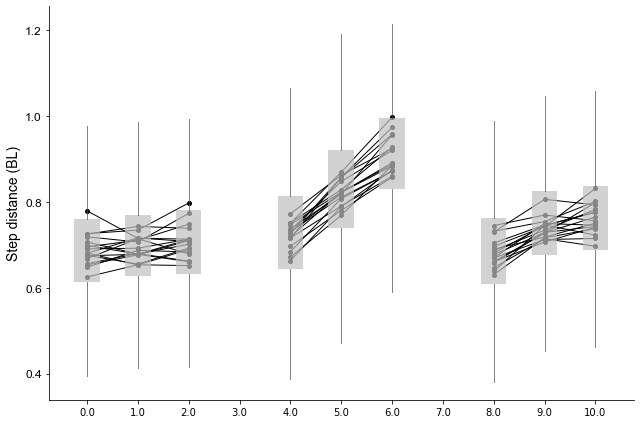

In [17]:
# combined plot of legs
plot_metric = step_distance_dists
plot_id = step_distance_leg_id
plt_stats = step_distance_stats
metric_ylabel = 'Step distance (BL)'
metric_plot_name = 'step_distance'
plot_intralimb_kinematics_task(plot_metric, plot_id, plt_stats, metric_ylabel, metric_plot_name, figure_dir)

### AEP and PEP spatial plots

In [3]:
def spatial_kinematics(metric_x, metric_y, meta_matrix, beh_class, tarsi_class, n_step_threshold, filter_metric, lower_filter_threshold, upper_filter_threshold):
  
    leg_dists_x = []
    leg_dists_y = []
    nflies = len(np.unique(meta_matrix[:, 0]).astype(int).tolist()) # how many flies
    tied_idxs = meta_matrix[:, 4] != 1 # presplit + postsplit - combined because no detectable adaptation
    split_idxs = meta_matrix[:, 4] == 1
    metric_stats = np.zeros((nflies, 5, 3, 3, 2)) # fly number, stat value, tied/LS/RS, leg, x/y
    
    for j in range(3): # leg combinations

        # isolate data per leg
        for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist():
            # find all trials associated with the specified conditions
            fly_idxs = meta_matrix[:, 0] == fly # fly

            # find tied, LS, and RS data
            tied_trial_idxs = np.logical_and.reduce((tied_idxs, fly_idxs))
            LS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 0, fly_idxs))
            RS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 1, fly_idxs))

            '''
            X position
            '''

            # get data
            # tied - get all presplit + postsplit data
            leg1_tied_xdata = metric_x[j, :, tied_trial_idxs].flatten()
            leg2_tied_xdata = metric_x[j+3, :, tied_trial_idxs].flatten()

            # combine faster moving data
            leg1_fast_split_xdata = metric_x[j, :, RS_trial_idxs].flatten()
            leg2_fast_split_xdata = metric_x[j+3, :, LS_trial_idxs].flatten()

            # combine slower moving data
            leg1_slow_split_xdata = metric_x[j, :, LS_trial_idxs].flatten() # right legs
            leg2_slow_split_xdata = metric_x[j+3, :, RS_trial_idxs].flatten() # left legs

            '''
            Y position
            '''
            # get data
            # tied - get all presplit + postsplit data
            leg1_tied_ydata = metric_y[j, :, tied_trial_idxs].flatten()
            leg2_tied_ydata = metric_y[j+3, :, tied_trial_idxs].flatten()

            # combine faster moving data
            leg1_fast_split_ydata = metric_y[j, :, RS_trial_idxs].flatten()
            leg2_fast_split_ydata = metric_y[j+3, :, LS_trial_idxs].flatten()

            # combine slower moving data
            leg1_slow_split_ydata = metric_y[j, :, LS_trial_idxs].flatten() # right legs
            leg2_slow_split_ydata = metric_y[j+3, :, RS_trial_idxs].flatten() # left legs


            '''Filter Metric'''
            leg1_tied_filter_metric = filter_metric[j, :, tied_trial_idxs].flatten()
            leg2_tied_filter_metric = filter_metric[j+3, :, tied_trial_idxs].flatten()

            # combine faster moving data
            leg1_fast_split_filter_metric = filter_metric[j, :, RS_trial_idxs].flatten()
            leg2_fast_split_filter_metric = filter_metric[j+3, :, LS_trial_idxs].flatten()

            # combine slower moving data
            leg1_slow_split_filter_metric = filter_metric[j, :, LS_trial_idxs].flatten() # right legs
            leg2_slow_split_filter_metric = filter_metric[j+3, :, RS_trial_idxs].flatten() # left legs

            # behavior classifier
            beh_tied = beh_class[tied_trial_idxs, :].flatten()
            beh_RS = beh_class[RS_trial_idxs, :].flatten()
            beh_LS = beh_class[LS_trial_idxs, :].flatten()

            # tarsi classifier (just for split period)
            tarsi_class_tied = tarsi_class[tied_trial_idxs, :].flatten()
            tarsi_class_RS = tarsi_class[RS_trial_idxs, :].flatten()
            tarsi_class_LS = tarsi_class[LS_trial_idxs, :].flatten()

            '''Filter Metric'''
            # filter tied and split data
            filt_leg1_tied_filter_metric = leg1_tied_filter_metric[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            filt_leg2_tied_filter_metric = leg2_tied_filter_metric[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            cat_tied_filter_metric = np.concatenate((filt_leg1_tied_filter_metric, filt_leg2_tied_filter_metric))

            # filter split data - Fast
            filt_leg1_fast_split_filter_metric = leg1_fast_split_filter_metric[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            filt_leg2_fast_split_filter_metric = leg2_fast_split_filter_metric[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            cat_fast_split_filter_metric = np.concatenate((filt_leg1_fast_split_filter_metric, filt_leg2_fast_split_filter_metric))

            # filter slow split legs
            filt_leg1_slow_split_filter_metric = leg1_slow_split_filter_metric[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            filt_leg2_slow_split_filter_metric = leg2_slow_split_filter_metric[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            cat_slow_split_filter_metric = np.concatenate((filt_leg1_slow_split_filter_metric, filt_leg2_slow_split_filter_metric))

            # filter tied and split data
            filt_leg1_tied_xdata = leg1_tied_xdata[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            filt_leg2_tied_xdata = leg2_tied_xdata[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            filt_leg1_tied_ydata = leg1_tied_ydata[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            filt_leg2_tied_ydata = leg2_tied_ydata[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
            cat_tied_xdata = np.concatenate((filt_leg1_tied_xdata, filt_leg2_tied_xdata))
            cat_tied_ydata = np.concatenate((-filt_leg1_tied_ydata, filt_leg2_tied_ydata))

            # filter split data - Fast
            filt_leg1_fast_split_xdata = leg1_fast_split_xdata[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            filt_leg2_fast_split_xdata = leg2_fast_split_xdata[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            filt_leg1_fast_split_ydata = leg1_fast_split_ydata[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            filt_leg2_fast_split_ydata = leg2_fast_split_ydata[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            cat_fast_split_xdata = np.concatenate((filt_leg1_fast_split_xdata, filt_leg2_fast_split_xdata))
            cat_fast_split_ydata = np.concatenate((-filt_leg1_fast_split_ydata, filt_leg2_fast_split_ydata))

            # filter slow split legs
            filt_leg1_slow_split_xdata = leg1_slow_split_xdata[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            filt_leg2_slow_split_xdata = leg2_slow_split_xdata[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            filt_leg1_slow_split_ydata = leg1_slow_split_ydata[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
            filt_leg2_slow_split_ydata = leg2_slow_split_ydata[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]
            cat_slow_split_xdata = np.concatenate((filt_leg1_slow_split_xdata, filt_leg2_slow_split_xdata))
            cat_slow_split_ydata = np.concatenate((-filt_leg1_slow_split_ydata, filt_leg2_slow_split_ydata))

            '''Filter data based on filter metric'''
            cat_tied_xdata[np.logical_or(cat_tied_filter_metric<lower_filter_threshold, cat_tied_filter_metric>upper_filter_threshold)]=-5
            cat_fast_split_xdata[np.logical_or(cat_fast_split_filter_metric<lower_filter_threshold, cat_fast_split_filter_metric>upper_filter_threshold)]=-5
            cat_slow_split_xdata[np.logical_or(cat_slow_split_filter_metric<lower_filter_threshold, cat_slow_split_filter_metric>upper_filter_threshold)]=-5

            cat_tied_ydata[np.logical_or(cat_tied_filter_metric<lower_filter_threshold, cat_tied_filter_metric>upper_filter_threshold)]=-5
            cat_fast_split_ydata[np.logical_or(cat_fast_split_filter_metric<lower_filter_threshold, cat_fast_split_filter_metric>upper_filter_threshold)]=-5
            cat_slow_split_ydata[np.logical_or(cat_slow_split_filter_metric<lower_filter_threshold, cat_slow_split_filter_metric>upper_filter_threshold)]=-5

            # filter out nans
            filt_cat_tied_xdata = cat_tied_xdata[~np.isnan(cat_tied_xdata)] 
            filt_cat_fast_split_xdata = cat_fast_split_xdata[~np.isnan(cat_fast_split_xdata)]
            filt_cat_slow_split_xdata = cat_slow_split_xdata[~np.isnan(cat_slow_split_xdata)]

            filt_cat_tied_ydata = cat_tied_ydata[~np.isnan(cat_tied_ydata)] 
            filt_cat_fast_split_ydata = cat_fast_split_ydata[~np.isnan(cat_fast_split_ydata)]
            filt_cat_slow_split_ydata = cat_slow_split_ydata[~np.isnan(cat_slow_split_ydata)]

            # filter out the metric value
            # filter out -5
            filt_cat_tied_xdata = filt_cat_tied_xdata[~(filt_cat_tied_xdata == -5)]
            filt_cat_fast_split_xdata = filt_cat_fast_split_xdata[~(filt_cat_fast_split_xdata == -5)]
            filt_cat_slow_split_xdata = filt_cat_slow_split_xdata[~(filt_cat_slow_split_xdata == -5)]

            filt_cat_tied_ydata = filt_cat_tied_ydata[~(filt_cat_tied_ydata == -5)]
            filt_cat_fast_split_ydata = filt_cat_fast_split_ydata[~(filt_cat_fast_split_ydata == -5)]
            filt_cat_slow_split_ydata = filt_cat_slow_split_ydata[~(filt_cat_slow_split_ydata == -5)]

            # compute stats
            # tied
            if len(filt_cat_tied_xdata) <= n_step_threshold:
                metric_stats[fly-1, 0, 1, j, 0] = np.nan
                metric_stats[fly-1, 1, 1, j, 0] = np.nan
                metric_stats[fly-1, 2, 1, j, 0] = np.nan
                metric_stats[fly-1, 3, 1, j, 0] = np.nan
                metric_stats[fly-1, 4, 1, j, 0] = len(filt_cat_tied_xdata) # number of steps

                metric_stats[fly-1, 0, 1, j, 1] = np.nan
                metric_stats[fly-1, 1, 1, j, 1] = np.nan
                metric_stats[fly-1, 2, 1, j, 1] = np.nan
                metric_stats[fly-1, 3, 1, j, 1] = np.nan
                metric_stats[fly-1, 4, 1, j, 1] = len(filt_cat_tied_ydata) # number of steps
            else:
                metric_stats[fly-1, 0, 1, j, 0] = np.mean(filt_cat_tied_xdata) # mean
                metric_stats[fly-1, 1, 1, j, 0] = np.std(filt_cat_tied_xdata) # std
                metric_stats[fly-1, 2, 1, j, 0] = np.median(filt_cat_tied_xdata) #median
                metric_stats[fly-1, 3, 1, j, 0] = iqr(filt_cat_tied_xdata) # IQR
                metric_stats[fly-1, 4, 1, j, 0] = len(filt_cat_tied_xdata) # number of steps

                metric_stats[fly-1, 0, 1, j, 1] = np.mean(filt_cat_tied_ydata) # mean
                metric_stats[fly-1, 1, 1, j, 1] = np.std(filt_cat_tied_ydata) # std
                metric_stats[fly-1, 2, 1, j, 1] = np.median(filt_cat_tied_ydata) #median
                metric_stats[fly-1, 3, 1, j, 1] = iqr(filt_cat_tied_ydata) # IQR
                metric_stats[fly-1, 4, 1, j, 1] = len(filt_cat_tied_ydata) # number of steps

            # Fast split
            if len(filt_cat_fast_split_xdata) <= n_step_threshold:
                metric_stats[fly-1, 0, 2, j,0] = np.nan
                metric_stats[fly-1, 1, 2, j,0] = np.nan
                metric_stats[fly-1, 2, 2, j,0] = np.nan
                metric_stats[fly-1, 3, 2, j,0] = np.nan
                metric_stats[fly-1, 4, 2, j,0] = len(filt_cat_fast_split_xdata) # number of steps

                metric_stats[fly-1, 0, 2, j,1] = np.nan
                metric_stats[fly-1, 1, 2, j,1] = np.nan
                metric_stats[fly-1, 2, 2, j,1] = np.nan
                metric_stats[fly-1, 3, 2, j,1] = np.nan
                metric_stats[fly-1, 4, 2, j,1] = len(filt_cat_fast_split_ydata) # number of steps
            else:
                metric_stats[fly-1, 0, 2, j,0] = np.mean(filt_cat_fast_split_xdata) # mean
                metric_stats[fly-1, 1, 2, j,0] = np.std(filt_cat_fast_split_xdata) # std
                metric_stats[fly-1, 2, 2, j,0] = np.median(filt_cat_fast_split_xdata) #median
                metric_stats[fly-1, 3, 2, j,0] = iqr(filt_cat_fast_split_xdata) # IQR
                metric_stats[fly-1, 4, 2, j,0] = len(filt_cat_fast_split_xdata) # number of steps

                metric_stats[fly-1, 0, 2, j,1] = np.mean(filt_cat_fast_split_ydata) # mean
                metric_stats[fly-1, 1, 2, j,1] = np.std(filt_cat_fast_split_ydata) # std
                metric_stats[fly-1, 2, 2, j,1] = np.median(filt_cat_fast_split_ydata) #median
                metric_stats[fly-1, 3, 2, j,1] = iqr(filt_cat_fast_split_ydata) # IQR
                metric_stats[fly-1, 4, 2, j,1] = len(filt_cat_fast_split_ydata) # number of steps

            # Slow split
            if len(filt_cat_slow_split_xdata) <= n_step_threshold:
                metric_stats[fly-1, 0, 0, j,0] = np.nan
                metric_stats[fly-1, 1, 0, j,0] = np.nan
                metric_stats[fly-1, 2, 0, j,0] = np.nan
                metric_stats[fly-1, 3, 0, j,0] = np.nan
                metric_stats[fly-1, 4, 0, j,0] = len(filt_cat_slow_split_xdata) # number of steps

                metric_stats[fly-1, 0, 0, j,1] = np.nan
                metric_stats[fly-1, 1, 0, j,1] = np.nan
                metric_stats[fly-1, 2, 0, j,1] = np.nan
                metric_stats[fly-1, 3, 0, j,1] = np.nan
                metric_stats[fly-1, 4, 0, j,1] = len(filt_cat_slow_split_ydata) # number of steps
            else:
                metric_stats[fly-1, 0, 0, j,0] = np.mean(filt_cat_slow_split_xdata) # mean
                metric_stats[fly-1, 1, 0, j,0] = np.std(filt_cat_slow_split_xdata) # std
                metric_stats[fly-1, 2, 0, j,0] = np.median(filt_cat_slow_split_xdata) #median
                metric_stats[fly-1, 3, 0, j,0] = iqr(filt_cat_slow_split_xdata) # IQR
                metric_stats[fly-1, 4, 0, j,0] = len(filt_cat_slow_split_xdata) # number of steps

                metric_stats[fly-1, 0, 0, j,1] = np.mean(filt_cat_slow_split_ydata) # mean
                metric_stats[fly-1, 1, 0, j,1] = np.std(filt_cat_slow_split_ydata) # std
                metric_stats[fly-1, 2, 0, j,1] = np.median(filt_cat_slow_split_ydata) #median
                metric_stats[fly-1, 3, 0, j,1] = iqr(filt_cat_slow_split_ydata) # IQR
                metric_stats[fly-1, 4, 0, j,1] = len(filt_cat_slow_split_ydata) # number of steps


            if fly == 1:
                combined_tied_distx = filt_cat_tied_xdata 
                combined_fast_split_distx = filt_cat_fast_split_xdata
                combined_slow_split_distx = filt_cat_slow_split_xdata

                combined_tied_disty = filt_cat_tied_ydata 
                combined_fast_split_disty = filt_cat_fast_split_ydata
                combined_slow_split_disty = filt_cat_slow_split_ydata
            else:
                combined_tied_distx = np.concatenate((combined_tied_distx, filt_cat_tied_xdata))
                combined_fast_split_distx = np.concatenate((combined_fast_split_distx, filt_cat_fast_split_xdata))
                combined_slow_split_distx = np.concatenate((combined_slow_split_distx, filt_cat_slow_split_xdata))

                combined_tied_disty = np.concatenate((combined_tied_disty, filt_cat_tied_ydata))
                combined_fast_split_disty = np.concatenate((combined_fast_split_disty, filt_cat_fast_split_ydata))
                combined_slow_split_disty = np.concatenate((combined_slow_split_disty, filt_cat_slow_split_ydata))

        leg_dists_x.append([combined_slow_split_distx, combined_tied_distx, combined_fast_split_distx])
        leg_dists_y.append([combined_slow_split_disty, combined_tied_disty, combined_fast_split_disty])

    return leg_dists_x, leg_dists_y, metric_stats

In [4]:
# AEP and PEP distributions and stats
filter_metric = step_freq
lower_filter_threshold = 5 # 200 ms Thresholds based on previous literature
upper_filter_threshold = 20 # ~55 ms
n_step_threshold = 15
aep_dist_x, aep_dist_y, aep_stats = spatial_kinematics(aepx, aepy, meta_matrix, beh_class, tarsi_class, n_step_threshold, filter_metric, lower_filter_threshold, upper_filter_threshold)
pep_dist_x, pep_dist_y, pep_stats = spatial_kinematics(pepx, pepy, meta_matrix, beh_class, tarsi_class, n_step_threshold, filter_metric, lower_filter_threshold, upper_filter_threshold)

#### Plot AEP and PEP seperately

In [33]:
figure_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/manuscripts/treadmill_2023/figures/raw/SB/'

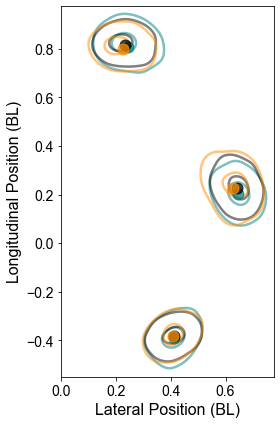

In [43]:
# Plot AEP - KDE
level_vals = [0.2, 0.8]#, 0.5, 0.9] #[0.2, 0.4, 0.6, 0.8, 1]  #[0.5, 0.7, 0.9]
plt_colors = ['teal', 'black', 'darkorange']

fig = plt.figure(1, figsize = [4,6])
for leg in range(3): # leg pair
    for condition in range(3): # split condition
        # AEP
        sea.kdeplot(x=aep_dist_y[leg][condition], y=aep_dist_x[leg][condition], color = plt_colors[condition], levels = level_vals, alpha = 0.5, linewidths = 2.5, zorder = 1, bw_adjust=1.5)
        plt.plot(np.nanmean(aep_dist_y[leg][condition]), np.nanmean(aep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 22, linestyle = 'none', zorder = 15, alpha = 0.75)

# plot parameters
plt.xlabel('Lateral Position (BL)', fontsize = 16, fontname = 'Arial')
plt.ylabel('Longitudinal Position (BL)', fontsize = 16, fontname = 'Arial')
plt.xticks(fontsize = 14, fontname = 'Arial')
plt.yticks(fontsize = 14, fontname = 'Arial')
plt.xlim([0, 0.775])
plt.ylim([-0.55, 0.975])
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'aep.svg', dpi = 300)
fig.savefig(figure_dir + 'aep.png', dpi = 300)

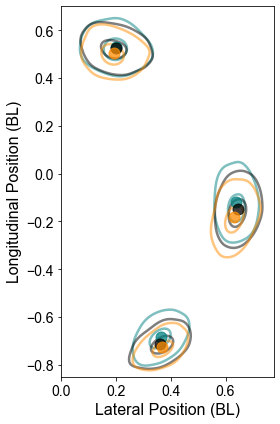

In [42]:
# Plot PEP - KDE
level_vals = [0.2, 0.8]#, 0.5, 0.9] #[0.2, 0.4, 0.6, 0.8, 1]  #[0.5, 0.7, 0.9]
plt_colors = ['teal', 'black', 'darkorange']

fig = plt.figure(1, figsize = [4,6])
for leg in range(3): # leg pair
    for condition in range(3): # split condition
        # AEP
        sea.kdeplot(x=pep_dist_y[leg][condition], y=pep_dist_x[leg][condition], color = plt_colors[condition], levels = level_vals, alpha = 0.5, linewidths = 2.5, zorder = 1, bw_adjust=1.5)
        plt.plot(np.nanmean(pep_dist_y[leg][condition]), np.nanmean(pep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 22, linestyle = 'none', zorder = 15, alpha = 0.75)

# plot parameters
plt.xlabel('Lateral Position (BL)', fontsize = 16, fontname = 'Arial')
plt.ylabel('Longitudinal Position (BL)', fontsize = 16, fontname = 'Arial')
plt.xticks(fontsize = 14, fontname = 'Arial')
plt.yticks(fontsize = 14, fontname = 'Arial')
plt.xlim([0, 0.775])
plt.ylim([-0.85, 0.7])
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'pep.svg', dpi = 300)
fig.savefig(figure_dir + 'pep.png', dpi = 300)

#### Run bootstraped stats

In [91]:
from scipy import stats
def bootstrap_stats(n_bootstraps, pval_thresh, bon_correction, pop1, pop2, plotting, comparasion):
    print(comparasion)
    n_pop1 = len(pop1)
    n_pop2 = len(pop2)
    mean_pop_diff = np.mean(pop2) - np.mean(pop1) # BL
    pooled_pop = np.concatenate((pop1, pop2))

    # bootstraping 
    mean_stat_diff = np.zeros(n_bootstraps)
    for j in range(n_bootstraps):
        resample_pop1 = np.random.permutation(pooled_pop)[0:n_pop1] # randomly permute from a uniform distribution
        resample_pop2 = np.random.permutation(pooled_pop)[n_pop1::]
        mean_stat_diff[j] = np.mean(resample_pop2) - np.mean(resample_pop1)

    if plotting:
        plt.figure(1, figsize =[5,5])
        hist, bin_edges = np.histogram(mean_stat_diff, bins=30, density=True)
        plt.hist(mean_stat_diff, bins = 30, color='k', density = True)
        plt.plot(np.array([mean_pop_diff, mean_pop_diff]), np.array([0,max(hist)]), color ='r')

    # compute p-value
    if mean_pop_diff> 0:
        n_sig_samples = len(np.where(mean_stat_diff>=mean_pop_diff)[0])
    else:
        n_sig_samples = len(np.where(mean_stat_diff<=mean_pop_diff)[0])
    pvalue = n_sig_samples/n_bootstraps
    if pvalue == 0: # correct for the number of bootstraps
        pvalue = 1/n_bootstraps
    print('p value = ', pvalue)

    # significance threshold with bonferroni correction
    if pvalue <= (pval_thresh/bon_correction):
        print('Statistically Significant')
    else:
        print('Not Statistically Significant')

##### AEP stats

In [97]:
0.05/36

0.001388888888888889

AEP
p value =  0.0024
Not Statistically Significant
Ttest_indResult(statistic=-2.554705202982586, pvalue=0.010748190765087822)


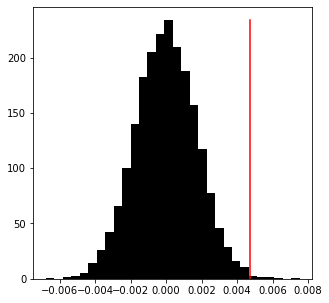

In [118]:
# define bootstrapping parameters
n_bootstraps = 5000
pval_thresh = 0.05
bon_correction = 36 # 6 legs and 2 axes and 3 conditions
plotting = True
comparasion = 'AEP'
leg = 2
pop1 = aep_dist_y[leg][2]
pop2 = aep_dist_y[leg][1]
bootstrap_stats(n_bootstraps, pval_thresh, bon_correction, pop1, pop2, plotting, comparasion)
# print(stats.kruskal(pop1, pop2))
print(stats.ttest_ind(pop1, pop2, equal_var = False)) # identical averages
# print(stats.mannwhitneyu(pop1, pop2))
# print(stats.kstest(pop1, pop2))

AEP
p value =  0.443
Not Statistically Significant
Ttest_indResult(statistic=0.10366543416981658, pvalue=0.9174524993647997)


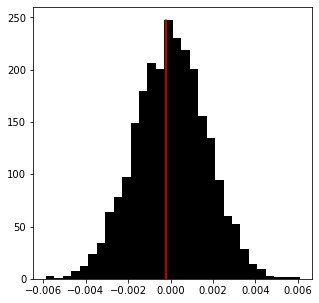

In [120]:
# define bootstrapping parameters
n_bootstraps = 5000
pval_thresh = 0.05
bon_correction = 36 # 6 legs and 2 axes and 3 conditions
plotting = True
comparasion = 'AEP'
leg = 2
pop1 = aep_dist_x[leg][2]
pop2 = aep_dist_x[leg][1]
bootstrap_stats(n_bootstraps, pval_thresh, bon_correction, pop1, pop2, plotting, comparasion)
print(stats.ttest_ind(pop1, pop2, equal_var = False)) # identical averages

##### PEP stats

PEP lateral
p value =  0.002
Not Statistically Significant
Ttest_indResult(statistic=2.8668925060554353, pvalue=0.004210252207071616)


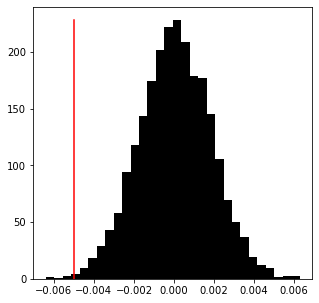

In [132]:
# define bootstrapping parameters
n_bootstraps = 5000
pval_thresh = 0.05
bon_correction = 36 # 6 legs and 2 axes and 3 conditions
plotting = True
comparasion = 'PEP lateral'
leg = 2
pop1 = pep_dist_y[leg][2]
pop2 = pep_dist_y[leg][1]
bootstrap_stats(n_bootstraps, pval_thresh, bon_correction, pop1, pop2, plotting, comparasion)
# print(stats.kruskal(pop1, pop2))
print(stats.ttest_ind(pop1, pop2, equal_var = False)) # identical averages
# print(stats.mannwhitneyu(pop1, pop2))
# print(stats.kstest(pop1, pop2))

PEP longitudinal
p value =  0.0002
Statistically Significant
Ttest_indResult(statistic=-6.141963094721926, pvalue=1.0915117527771578e-09)


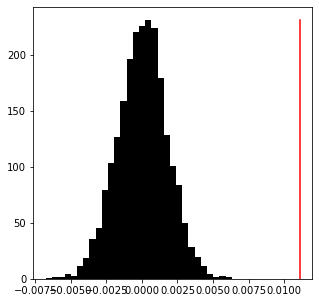

In [131]:
# define bootstrapping parameters
n_bootstraps = 5000
pval_thresh = 0.05
bon_correction = 36 # 6 legs and 2 axes and 3 conditions
plotting = True
comparasion = 'PEP longitudinal'
leg = 2
pop1 = pep_dist_x[leg][2]
pop2 = pep_dist_x[leg][1]
bootstrap_stats(n_bootstraps, pval_thresh, bon_correction, pop1, pop2, plotting, comparasion)
print(stats.ttest_ind(pop1, pop2, equal_var = False)) # identical averages

#### AEP and PEP combined

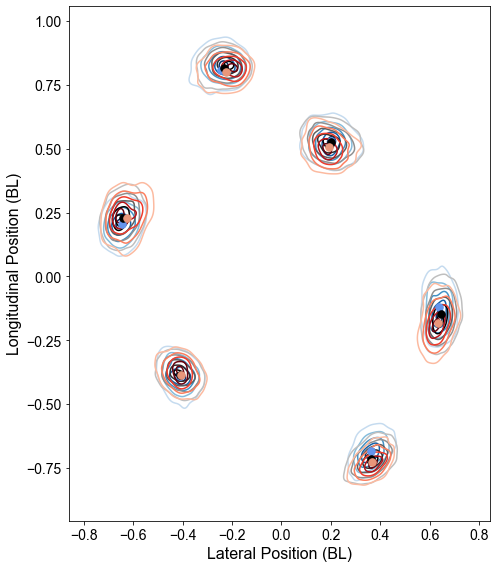

In [560]:
# generate new colormaps
nlevels = 5
start_cval = 0.25
newcmps = []
org_cmaps = ['Blues', 'binary', 'Reds']
for j in range(len(org_cmaps)):
    org_cmap = cm.get_cmap(org_cmaps[j], 100)
    newcolors = org_cmap(np.linspace(0.25, 1, nlevels))
    newcmp = ListedColormap(newcolors)
    newcmps.append(newcmp)

# Plot AEP and PEP for forward walking and left/ right turns - KDE
level_vals = [0.2, 0.4, 0.6, 0.8, 0.95]  #[0.5, 0.7, 0.9]
plt_colors = ['cornflowerblue', 'black', 'darksalmon']

fig = plt.figure(1, figsize = [7,8])
for leg in range(3): # leg pair
    for condition in range(3): # split condition
        # AEP
        sea.kdeplot(x=-aep_dist_y[leg][condition], y=aep_dist_x[leg][condition], cmap = newcmps[condition], levels = level_vals)
#         plt.plot(np.nanmean(-aep_dist_y[leg][condition]), np.nanmean(aep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 10, linestyle = 'none', zorder = 15)
#         plt.plot(-aep_stats[:,2,condition, leg, 1], aep_stats[:,2,condition, leg, 0], color = plt_colors[condition], marker = '.', markersize = 5, alpha= 0.5, linestyle = 'none', zorder = 1)
        
        # PEP
        sea.kdeplot(x=pep_dist_y[leg][condition], y=pep_dist_x[leg][condition], cmap = newcmps[condition], levels = level_vals)
#         plt.plot(np.nanmean(pep_dist_y[leg][condition]), np.nanmean(pep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 10, linestyle = 'none', zorder = 15)
#         plt.plot(pep_stats[:,2,condition, leg, 1], pep_stats[:,2,condition, leg, 0], color = plt_colors[condition], marker = '.', markersize = 5, alpha= 0.5, linestyle = 'none', zorder = 1)

for leg in range(3): # leg pair
    for condition in range(3): # split condition
        plt.plot(np.nanmean(-aep_dist_y[leg][condition]), np.nanmean(aep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 15, linestyle = 'none', zorder = 15)
        plt.plot(np.nanmean(pep_dist_y[leg][condition]), np.nanmean(pep_dist_x[leg][condition]), color = plt_colors[condition], marker = '.', markersize = 15, linestyle = 'none', zorder = 15)
        
# plot parameters
plt.xlabel('Lateral Position (BL)', fontsize = 16, fontname = 'Arial')
plt.ylabel('Longitudinal Position (BL)', fontsize = 16, fontname = 'Arial')
plt.xticks(fontsize = 14, fontname = 'Arial')
plt.yticks(fontsize = 14, fontname = 'Arial')
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + save_name + 'aep_pep.pdf', dpi = 200)
fig.savefig(figure_dir + save_name + 'aep_pep.png', dpi = 200)

### Interlimb coordination

In [29]:
# calculate mean of polar distributions by transforming them into cartesian coordinates then back to polar coordinates
def estimate_ang_stats(var):
#     mean_angle = np.arctan2(np.nanmedian(np.sin(var)), np.nanmedian(np.cos(var)))
    mean_angle = np.arctan2(np.nanmean(np.sin(var)), np.nanmean(np.cos(var)))
    angular_dispersion = np.sqrt(np.nanmean(np.sin(var))**2 + np.nanmean(np.cos(var))**2) # 0: uniform, 1: concetrated in one directtion
    return mean_angle, angular_dispersion

In [30]:
def compute_histogram(var, N):
    hist, bin_edges = np.histogram(var, bins=N, range=(0.0,2*np.pi), density=True)
    bin_centers = bin_edges[1::] - ((bin_edges[1]- bin_edges[0])/2)
    return hist, bin_centers 


In [31]:
# transform phase values to between -np.pi to np.pi
def transform_half_polar(var):
    var[var>np.pi] = var[var>np.pi] - (2*np.pi)
    return var

In [32]:
def compute_inphase_histogram(var, N):
    hist, bin_edges = np.histogram(var, bins=N, range=(-np.pi, np.pi), density=True)
    bin_centers = bin_edges[1::] - ((bin_edges[1]- bin_edges[0])/2)
    return hist, bin_centers 

In [33]:
# function that transforms that space from 0 to pi to 0 to 2pi
def transform_polar(org_val):
    if org_val < 0: # only need to transform negative values to extend the space to 2pi
        transformed_val = np.pi + np.abs(-np.pi - org_val)
    else: 
        transformed_val = org_val
        
    return transformed_val

In [34]:
# compute phase stats and distributions
step_threshold = 10 # empirically determined
Nbins = 15
rel_phase_comparasions = [1, 4, 0, 3, 2] # L1-R2, L1-L3, L1-R1, L1-L2, L1-R3
inphase_comparasions = [1,4,5,7,10]
phase_dists = []
nflies = len(np.unique(meta_matrix[:, 0]).astype(int).tolist()) # how many flies
stat_mat = np.zeros((nflies, 2, len(rel_phase_comparasions), 3)) # fly/stats/phase comparasion/LS,tied,RS

# trial idxs
tied_idxs = meta_matrix[:, 4] != 1 # presplit + postsplit - combined because no detectable adaptation
split_idxs = meta_matrix[:, 4] == 1

p_cnt = -1
for p in rel_phase_comparasions: # phases
    p_cnt += 1
    f_cnt = -1
    for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist():
        f_cnt += 1
        fly_idxs = meta_matrix[:, 0] == fly # fly

        # find tied, LS, and RS data
        tied_trial_idxs = np.logical_and.reduce((tied_idxs, fly_idxs))
        LS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 0, fly_idxs))
        RS_trial_idxs = np.logical_and.reduce((split_idxs, meta_matrix[:, 3] == 1, fly_idxs))

        # data
        tied_data = phase[p, :, tied_trial_idxs].flatten()
        LS_data = phase[p, :, LS_trial_idxs].flatten()
        RS_data = phase[p, :, RS_trial_idxs].flatten()

        # behavior classifier
        beh_tied = beh_class[tied_trial_idxs, :].flatten()
        beh_RS = beh_class[RS_trial_idxs, :].flatten()
        beh_LS = beh_class[LS_trial_idxs, :].flatten()

        # tarsi classifier (just for split period)
        tarsi_class_tied = tarsi_class[tied_trial_idxs, :].flatten()
        tarsi_class_RS = tarsi_class[RS_trial_idxs, :].flatten()
        tarsi_class_LS = tarsi_class[LS_trial_idxs, :].flatten()

        # filter data based on behavior and tarsi position
        filt_tied_data = tied_data[np.logical_and.reduce((beh_tied == 1, tarsi_class_tied != 7))]
        filt_LS_data = LS_data[np.logical_and.reduce((beh_LS == 1, tarsi_class_LS == 0))]
        filt_RS_data = RS_data[np.logical_and.reduce((beh_RS == 1, tarsi_class_RS == 0))]

        # filter out non-vals = -1 in this case
        filt_tied_data = filt_tied_data[filt_tied_data != -1]
        filt_LS_data = filt_LS_data[filt_LS_data != -1]
        filt_RS_data = filt_RS_data[filt_RS_data != -1]

        # just in case, filter out nans
        filt_tied_data = filt_tied_data[~np.isnan(filt_tied_data)]
        filt_LS_data = filt_LS_data[~np.isnan(filt_LS_data)]
        filt_RS_data = filt_RS_data[~np.isnan(filt_RS_data)]

        # scale remaining phase data by 2pi to transform it into the unit circle
        filt_tied_data = filt_tied_data *(2*np.pi)
        filt_LS_data = filt_LS_data *(2*np.pi)
        filt_RS_data = filt_RS_data *(2*np.pi)

        # store fly stats
        if len(filt_tied_data) >= step_threshold:
            tied_mean, tied_dispersion = estimate_ang_stats(filt_tied_data)
            if p in inphase_comparasions:
                stat_mat[f_cnt, 0, p_cnt, 1] = tied_mean
                
                # distribution
                tied_dist = transform_half_polar(filt_tied_data)
                tied_prob, tied_bin_centers = compute_inphase_histogram(transform_half_polar(filt_tied_data), Nbins)

                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(tied_bin_centers, tied_prob)
                stat_mat[f_cnt, 1, p_cnt, 1] =  f(tied_mean)
            else:
                stat_mat[f_cnt, 0, p_cnt, 1] = transform_polar(tied_mean)
                tied_prob, tied_bin_centers = compute_histogram(filt_tied_data, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(tied_bin_centers, tied_prob)
                stat_mat[f_cnt, 1, p_cnt, 1] =  f(transform_polar(tied_mean))
   
        else:
            stat_mat[f_cnt, 0, p_cnt, 1] = np.nan
            stat_mat[f_cnt, 1, p_cnt, 1] = np.nan


        if len(filt_LS_data) >= step_threshold:
            LS_mean, LS_dispersion = estimate_ang_stats(filt_LS_data)
            if p in inphase_comparasions:
                stat_mat[f_cnt, 0, p_cnt, 0] = LS_mean
                
                # distribution
                LS_dist = transform_half_polar(filt_LS_data)
                LS_prob, LS_bin_centers = compute_inphase_histogram(transform_half_polar(filt_LS_data), Nbins)

                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(LS_bin_centers, LS_prob)
                stat_mat[f_cnt, 1, p_cnt, 0] =  f(LS_mean)
            else:
                stat_mat[f_cnt, 0, p_cnt, 0] = transform_polar(LS_mean)
                LS_prob, LS_bin_centers = compute_histogram(filt_LS_data, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(LS_bin_centers, LS_prob)
                stat_mat[f_cnt, 1, p_cnt, 0] =  f(transform_polar(LS_mean))

        else:
            stat_mat[f_cnt, 0, p_cnt, 0] = np.nan
            stat_mat[f_cnt, 1, p_cnt, 0] = np.nan

        if len(filt_RS_data) >= step_threshold:
            RS_mean, RS_dispersion = estimate_ang_stats(filt_RS_data)
            if p in inphase_comparasions:
                stat_mat[f_cnt, 0, p_cnt, 2] = RS_mean
                
                # distribution
                RS_dist = transform_half_polar(filt_RS_data)
                RS_prob, RS_bin_centers = compute_inphase_histogram(transform_half_polar(filt_RS_data), Nbins)

                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(RS_bin_centers, RS_prob)
                stat_mat[f_cnt, 1, p_cnt, 2] =  f(RS_mean)
                
            else: # only do the polar transformations for out of phase comparasions
                stat_mat[f_cnt, 0, p_cnt, 2] = transform_polar(RS_mean)
                RS_prob, RS_bin_centers = compute_histogram(filt_RS_data, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(RS_bin_centers, RS_prob)
                stat_mat[f_cnt, 1, p_cnt, 2] =  f(transform_polar(RS_mean))

        else:
            stat_mat[f_cnt, 0, p_cnt, 2] = np.nan
            stat_mat[f_cnt, 1, p_cnt, 2] = np.nan
            

        # concatenate data across flies for each distrbution
        if f_cnt == 0:
            if p in inphase_comparasions:
                cat_tied_data = transform_half_polar(filt_tied_data)
                cat_LS_data = transform_half_polar(filt_LS_data)
                cat_RS_data = transform_half_polar(filt_RS_data)
                
            else:
                cat_tied_data = filt_tied_data
                cat_LS_data = filt_LS_data
                cat_RS_data = filt_RS_data
        else:
            if p in inphase_comparasions:
                cat_tied_data = np.concatenate((cat_tied_data, transform_half_polar(filt_tied_data)))
                cat_LS_data = np.concatenate((cat_LS_data, transform_half_polar(filt_LS_data)))
                cat_RS_data = np.concatenate((cat_RS_data, transform_half_polar(filt_RS_data)))           
            else:                
                cat_tied_data = np.concatenate((cat_tied_data, filt_tied_data))
                cat_LS_data = np.concatenate((cat_LS_data, filt_LS_data))
                cat_RS_data = np.concatenate((cat_RS_data, filt_RS_data))
                
    phase_dists.append([cat_LS_data, cat_tied_data, cat_RS_data])
        

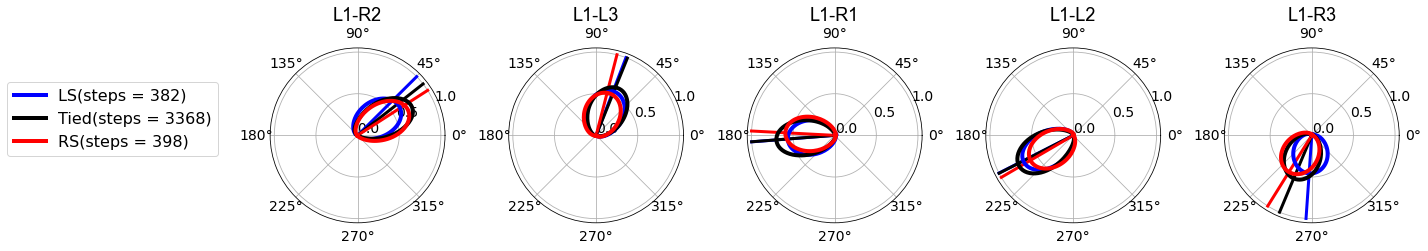

In [35]:
# plot relative phase to L1 - histograms
compare_labels = ['L1-R2', 'L1-L3', 'L1-R1','L1-L2', 'L1-R3']
plt_colors = ['blue', 'black', 'red']
plt_axes = [[0,1],[1,1],[2,1],[1,0],[2,0]]
task_labels = ['LS', 'Tied', 'RS']

fig, axs = plt.subplots(1,5, figsize =[20,5], sharex=True, sharey=True, subplot_kw={'projection': 'polar'})
for p in range(stat_mat.shape[2]):
    for j in range(3): # LS, tied, RS
#         for fly in range(stat_mat.shape[0]):
#             axs[p].plot(np.array([0, stat_mat[fly,0,p,j]]), np.array([0, stat_mat[fly,1,p,j]]), color = plt_colors[j], linewidth = 1, zorder=1, alpha = 0.5)
        
        # plot distribution
        sea.kdeplot(ax= axs[p], x=phase_dists[p][j], color = plt_colors[j], linewidth = 4, zorder=10, label = task_labels[j]+'(steps = ' + str(len(phase_dists[p][j]))+')', bw_adjust=2) 
        
        # plot mean 
        phase_mean, _= estimate_ang_stats(phase_dists[p][j])
        if j in [0,1,2]:
            if p in inphase_comparasions:
                axs[p].plot(np.array([0, phase_mean]),np.array([0,1]), color = plt_colors[j], linewidth = 3)
            else:
                axs[p].plot(np.array([0, transform_polar(phase_mean)]),np.array([0,1]), color = plt_colors[j], linewidth = 3)
        
        
    # plot parameters
    axs[p].tick_params(axis='both', labelsize=14)
    axs[p].set_ylabel(None)
    axs[p].set_title(compare_labels[p], fontsize=18, fontname="Arial")
    axs[p].set_rticks(np.arange(0,1.01,0.5))
#     axs[p].set_ylim([0,1.25])
    
    if p ==0:
        axs[p].legend(fontsize = 16, bbox_to_anchor=(-0.25, 0.85))
        
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'L1_rel_phase.png', dpi = 200)
fig.savefig(figure_dir + 'L1_rel_phase.svg', dpi = 200)